<a href="https://colab.research.google.com/github/jinwook-kim0/dt-training/blob/main/%ED%83%90%EC%83%89%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import matplotlib as mpl
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = 'drive/MyDrive/Colab Notebooks/'
import pandas as pd

In [ ]:
train_sensors = pd.read_csv(f'{path}train_sensor.csv')

In [ ]:
train_sensors

,module_name,key_val,param_alias,mean_val,end_time,step_id
0,EQ4_PM6,LOT64_18,EPD_para4,0.00000,2021-10-11 01:59:49,17
1,EQ7_PM2,LOT102_18,TIME_para7,1401.18330,2021-10-04 06:37:59,13
2,EQ8_PM2,LOT8_18,HV_para3,0.00000,2021-10-09 01:31:39,4
3,EQ4_PM2,LOT79_18,TIME_para8,248.91667,2021-10-12 08:09:21,13
4,EQ9_PM5,LOT218_08,GAS_para10,0.00000,2021-10-05 02:14:31,17
...,...,...,...,...,...,...
406310,EQ4_PM2,LOT359_21,TEMP_para93,150.10770,2021-10-15 06:15:57,13
406311,EQ11_PM5,LOT401_19,TIME_para62,2336.63330,2021-10-02 04:16:48,4
406312,EQ6_PM6,LOT332_19,HV_para56,0.24000,2021-10-21 06:22:03,4
406313,EQ6_PM5,LOT460_18,GAS_para85,0.00000,2021-10-16 14:03:13,12


In [ ]:
# Parameter 갯수

len(train_sensors.param_alias.unique())

95

In [ ]:
# Wafer 갯수 
len(train_sensors.key_val.unique())

611

<BarContainer object of 47 artists>

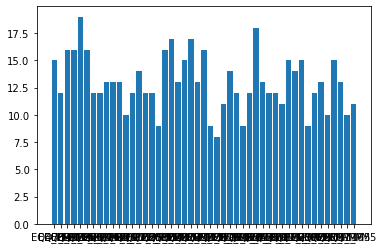

In [ ]:
# 장비당 Wafer 배정
plt.bar(train_sensors.module_name.unique(), [len(train_sensors[train_sensors.module_name == x].key_val.unique()) for x in train_sensors.module_name.unique()])


In [ ]:
# Wafer당 Data 
{len(train_sensors[train_sensors.key_val == x]) for x in train_sensors.key_val.unique()}

{665}

In [ ]:
# 장비가 진행하는 step id
{x: sorted(train_sensors[train_sensors.module_name == x].step_id.unique()) for x in train_sensors.module_name.unique()}

{'EQ10_PM1': [4, 6, 12, 13, 17, 18, 20],
 'EQ10_PM2': [4, 6, 12, 13, 17, 18, 20],
 'EQ10_PM5': [4, 6, 12, 13, 17, 18, 20],
 'EQ10_PM6': [4, 6, 12, 13, 17, 18, 20],
 'EQ11_PM1': [4, 6, 12, 13, 17, 18, 20],
 'EQ11_PM2': [4, 6, 12, 13, 17, 18, 20],
 'EQ11_PM5': [4, 6, 12, 13, 17, 18, 20],
 'EQ11_PM6': [4, 6, 12, 13, 17, 18, 20],
 'EQ12_PM1': [4, 6, 12, 13, 17, 18, 20],
 'EQ12_PM2': [4, 6, 12, 13, 17, 18, 20],
 'EQ12_PM5': [4, 6, 12, 13, 17, 18, 20],
 'EQ12_PM6': [4, 6, 12, 13, 17, 18, 20],
 'EQ1_PM1': [4, 6, 12, 13, 17, 18, 20],
 'EQ1_PM2': [4, 6, 12, 13, 17, 18, 20],
 'EQ1_PM5': [4, 6, 12, 13, 17, 18, 20],
 'EQ1_PM6': [4, 6, 12, 13, 17, 18, 20],
 'EQ2_PM1': [4, 6, 12, 13, 17, 18, 20],
 'EQ2_PM2': [4, 6, 12, 13, 17, 18, 20],
 'EQ2_PM5': [4, 6, 12, 13, 17, 18, 20],
 'EQ2_PM6': [4, 6, 12, 13, 17, 18, 20],
 'EQ3_PM1': [4, 6, 12, 13, 17, 18, 20],
 'EQ3_PM2': [4, 6, 12, 13, 17, 18, 20],
 'EQ3_PM5': [4, 6, 12, 13, 17, 18, 20],
 'EQ3_PM6': [4, 6, 12, 13, 17, 18, 20],
 'EQ4_PM1': [4, 6, 12, 13, 1

In [ ]:
# Wafer가 거쳐간 장비가 1개 이상인 경우가 있는지
{len(train_sensors[train_sensors.key_val == x].module_name.unique()) for x in train_sensors.key_val.unique()}

{1}

In [ ]:
train_sensors['end_time'] = pd.to_datetime(train_sensors['end_time'])

In [ ]:
train_sensors[train_sensors['key_val'] == 'LOT64_18'].sort_values('step_id').groupby('step_id').min().end_time

step_id
4    2021-10-11 01:35:10
6    2021-10-11 01:37:32
12   2021-10-11 01:51:37
13   2021-10-11 01:51:53
17   2021-10-11 01:59:49
18   2021-10-11 02:00:05
20   2021-10-11 02:06:56
Name: end_time, dtype: datetime64[ns]

In [ ]:
train_sensors[train_sensors['key_val'] == 'LOT64_18'].sort_values('step_id').groupby('step_id').max().end_time

step_id
4    2021-10-11 01:35:10
6    2021-10-11 01:37:32
12   2021-10-11 01:51:37
13   2021-10-11 01:51:53
17   2021-10-11 01:59:49
18   2021-10-11 02:00:05
20   2021-10-11 02:06:56
Name: end_time, dtype: datetime64[ns]